In [1]:
# at the moment, best way to extract some features and evaluate them
# is using AlignedFeatureData class
from pystoms.aligned_feature_data import AlignedFeatureData
# import a model
from pystoms.models_3d.model_3d_m3 import ModelM3
# Data handling is done by proteolizarddata (https://github.com/theGreatHerrLebert/proteolizard-data)
from proteolizarddata.data import PyTimsDataHandleDDA
# for generating random feature ids
import matplotlib.pyplot as plt
import arviz as az
from pystoms.plotting import plot_marginals
plt.style.use("ggplot")
import numpy as np
random_seed = 2023
rng = np.random.default_rng(random_seed)


2022-10-18 13:46:42.165726: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-18 13:46:42.321006: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-18 13:46:42.321020: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-18 13:46:42.345719: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-18 13:46:43.051390: W tensorflow/stream_executor/platform/de

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
def f(mz,mob,params):
    part1 = np.exp(
            -((params["i_t"] - mob) ** 2) / (2 * params["i_s"]**2)
                    )
    part2 = np.sum(
            params["w"]* np.exp(-((params["pos"] - mz) ** 2) / (2 * params["mz_s"]**2)))
    return params["a"]*part1*part2

In [4]:
# get data
data_path = "/home/tim/Workspaces/MassSpecDaten/M210115_001_Slot1-1_1_850.d/"
data_handle = PyTimsDataHandleDDA(data_path)

In [5]:
total_features = 1
feature_ids = rng.integers(low=1000,high=4001,size=total_features)
print(feature_ids)

[2420]


In [6]:
aligned_features = AlignedFeatureData(
                            data_handle,
                            ids=feature_ids,
                            is_parallel=False)

In [7]:
aligned_features.feature_data.dims

Frozen({'feature': 1, 'data_point': 13})

In [8]:
# create model
model = ModelM3(aligned_features)#,random_number_generator=rng)


In [9]:
# no the model can be sampled
sample_trace = model.evaluation(prior_pred_out=True,posterior_pred_out=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [i_t, i_s, ms_mz, ms_s, alpha, me]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 47 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 17 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.05448, but should be close to 0.8. Try to increase the number of tuning steps.
/home/tim/miniconda3/envs/pymc_stable/lib/python3.10/site-packages/pymc/model.py:1879: ShapeWarning: You are resizing a variable with dimension 'data_point' which was initialized as a mutable dimension by another variable ('intensity'). Remember to update that variable with the correct shape to avoid shape issues.
  model.set_data(variable_name, new_value, coords=coords)
/home/tim/miniconda3/envs/pymc_stable/lib/python3.10/site-packages/pymc/model.py:1879: ShapeWarning: You are resizing a variable with dimension 'data_point' which was initialized as a mutable dimension by another var

/home/tim/miniconda3/envs/pymc_stable/lib/python3.10/site-packages/pymc/model.py:1879: ShapeWarning: You are resizing a variable with dimension 'data_point' which was initialized as a mutable dimension by another variable ('intensity'). Remember to update that variable with the correct shape to avoid shape issues.
  model.set_data(variable_name, new_value, coords=coords)
/home/tim/miniconda3/envs/pymc_stable/lib/python3.10/site-packages/pymc/model.py:1879: ShapeWarning: You are resizing a variable with dimension 'isotopic_peak' which was initialized as a mutable dimension by another variable ('charge'). Remember to update that variable with the correct shape to avoid shape issues.
  model.set_data(variable_name, new_value, coords=coords)


/home/tim/miniconda3/envs/pymc_stable/lib/python3.10/site-packages/pymc/model.py:1879: ShapeWarning: You are resizing a variable with dimension 'data_point' which was initialized as a mutable dimension by another variable ('intensity'). Remember to update that variable with the correct shape to avoid shape issues.
  model.set_data(variable_name, new_value, coords=coords)
/home/tim/miniconda3/envs/pymc_stable/lib/python3.10/site-packages/pymc/model.py:1879: ShapeWarning: You are resizing a variable with dimension 'isotopic_peak' which was initialized as a mutable dimension by another variable ('charge'). Remember to update that variable with the correct shape to avoid shape issues.
  model.set_data(variable_name, new_value, coords=coords)


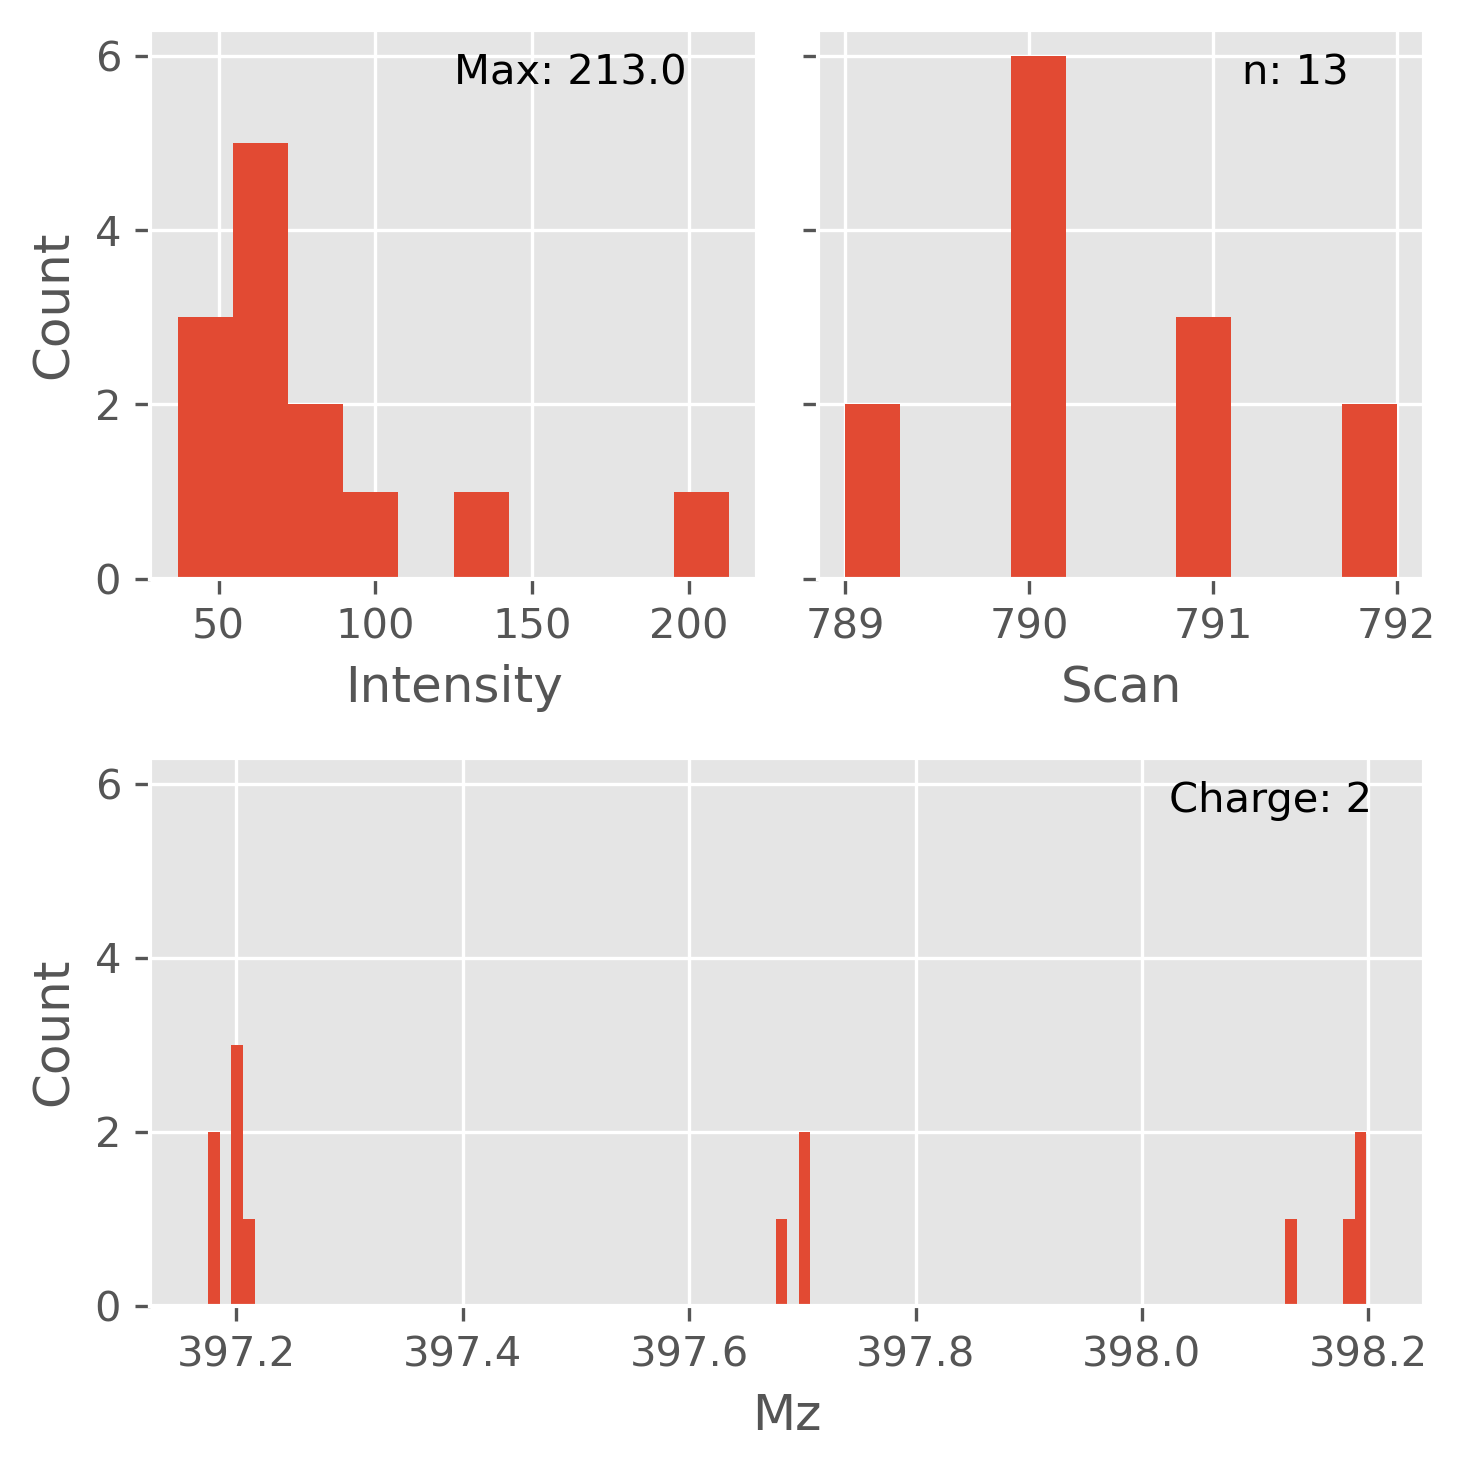

In [10]:
plot_marginals(aligned_features)

In [11]:
idata = sample_trace[0]

In [25]:
prior = idata.prior.isel({"feature":0,"isotopic_peak":0,"data_point":0})

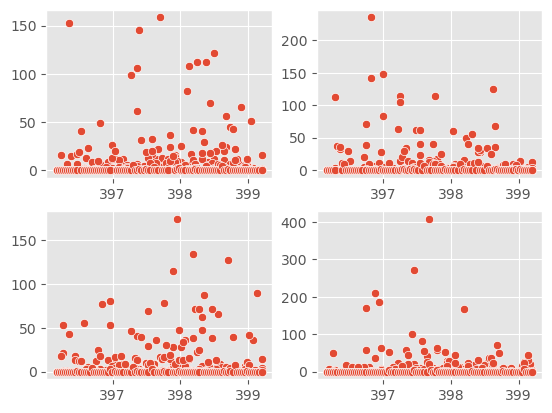

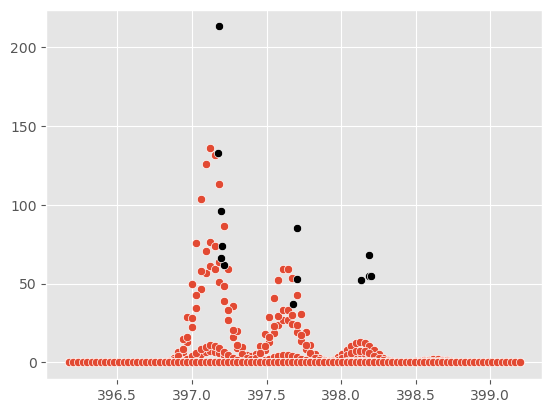

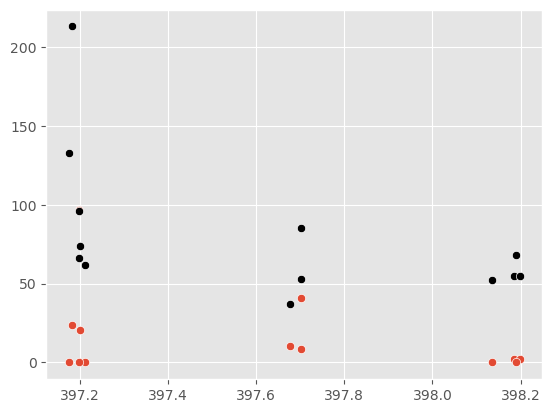

{'a': 212.76946149492306, 'i_t': 789.1554066605044, 'i_s': 0.47455556947446287, 'mz_s': 0.09004477754851054, 'w': array([6.43471462e-01, 2.83692155e-01, 6.25367583e-02, 9.19035201e-03,
       1.01295509e-03, 8.93178419e-05]), 'pos': array([397.12761064, 397.62761064, 398.12761064, 398.62761064,
       399.12761064, 399.62761064])}


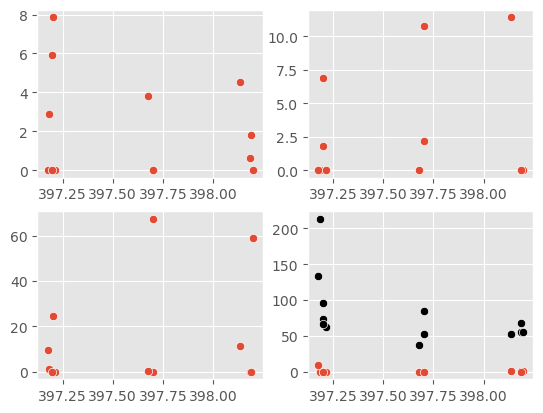

In [26]:
mz_axis = idata.predictions_constant_data.isel({"feature":0,"isotopic_peak":0}).mz.values
mz_axis_inplace = idata.constant_data.isel({"feature":0,"isotopic_peak":0}).mz.values
scan_axis = idata.predictions_constant_data.isel({"feature":0}).scan.values
scan_axis_inplace = idata.constant_data.isel({"feature":0}).scan.values


posterior_draw_idx = 10
chain_idx = 1
mu_post_1 = idata.predictions.isel({"feature":0,"draw":posterior_draw_idx,"chain":0}).mu.values
mu_post_2 = idata.predictions.isel({"feature":0,"draw":posterior_draw_idx,"chain":1}).mu.values
mu_post_3 = idata.predictions.isel({"feature":0,"draw":posterior_draw_idx,"chain":2}).mu.values
mu_post_4 = idata.predictions.isel({"feature":0,"draw":posterior_draw_idx,"chain":3}).mu.values


Fig,axs = plt.subplots(2,2)

sns.scatterplot(x=mz_axis,y=mu_post_1,ax=axs[0,0])
sns.scatterplot(x=mz_axis,y=mu_post_2,ax=axs[0,1])
sns.scatterplot(x=mz_axis,y=mu_post_3,ax=axs[1,0])
sns.scatterplot(x=mz_axis,y=mu_post_4,ax=axs[1,1])
plt.show()


from scipy.special import factorial
max_int = idata.constant_data.intensity.values.max()
post_draw = idata.posterior.isel({"draw":posterior_draw_idx,"chain":chain_idx})
charge = idata.constant_data.charge.values.flatten()[0]
posterior_params = {}
posterior_params["a"] = post_draw.alpha.values.flatten()[0]*max_int
posterior_params["i_t"] = post_draw.i_t.values.flatten()[0]
posterior_params["i_s"] = post_draw.i_s.values.flatten()[0]
mz_mu = post_draw.ms_mz.values.flatten()[0]
posterior_params["mz_s"] = post_draw.ms_s.values.flatten()[0]*model.model_parameters["mz_s_scale"]
peaks = np.arange(6)
λ = 0.000594 * (charge) * mz_mu - 0.03091
posterior_params["w"] = λ**peaks/factorial(peaks)*np.exp(-λ)
posterior_params["pos"] = peaks/charge +mz_mu

z = np.zeros_like(mz_axis)
for idx,(x,y) in enumerate(zip(mz_axis,scan_axis)):
    z[idx] = f(x,y,posterior_params)
z_inplace = np.zeros_like(mz_axis_inplace)
for idx,(x,y) in enumerate(zip(mz_axis_inplace,scan_axis_inplace)):
    z_inplace[idx] = f(x,y,posterior_params)

sns.scatterplot(x=mz_axis,y=z)
sns.scatterplot(x=idata.constant_data.isel({"feature":0,"isotopic_peak":0}).mz.values.flatten(),
                y=idata.observed_data.isel({"feature":0}).obs.values.flatten(),color="black")
plt.show()

sns.scatterplot(x=mz_axis_inplace,y=z_inplace)
sns.scatterplot(x=idata.constant_data.isel({"feature":0,"isotopic_peak":0}).mz.values.flatten(),
                y=idata.observed_data.isel({"feature":0}).obs.values.flatten(),color="black")
plt.show()

print(posterior_params)
mu_post_1_inplace = idata.posterior_predictive.isel({"feature":0,"draw":posterior_draw_idx,"chain":0}).mu.values
mu_post_2_inplace = idata.posterior_predictive.isel({"feature":0,"draw":posterior_draw_idx,"chain":1}).mu.values
mu_post_3_inplace = idata.posterior_predictive.isel({"feature":0,"draw":posterior_draw_idx,"chain":2}).mu.values
mu_post_4_inplace = idata.posterior_predictive.isel({"feature":0,"draw":posterior_draw_idx,"chain":3}).mu.values
Fig2, axs2 = plt.subplots(2,2)
sns.scatterplot(x=mz_axis_inplace,y=mu_post_1_inplace,ax=axs2[0,0])
sns.scatterplot(x=mz_axis_inplace,y=mu_post_2_inplace,ax=axs2[0,1])
sns.scatterplot(x=mz_axis_inplace,y=mu_post_3_inplace,ax=axs2[1,0])
sns.scatterplot(x=mz_axis_inplace,y=mu_post_4_inplace,ax=axs2[1,1])
sns.scatterplot(x=mz_axis_inplace,y=idata.observed_data.isel({"feature":0}).obs.values.flatten(),color="black")

plt.show()

/tmp/ipykernel_42645/2827295644.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  Fig3.show()
/tmp/ipykernel_42645/2827295644.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  Fig4.show()


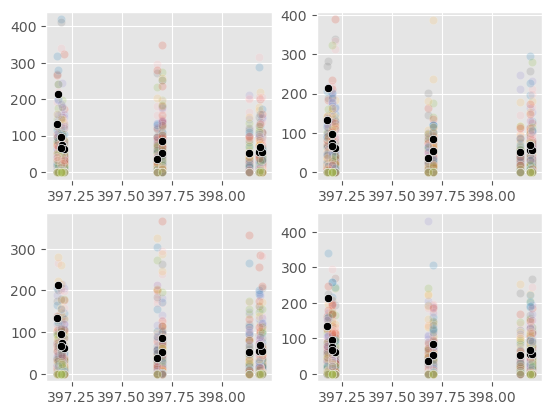

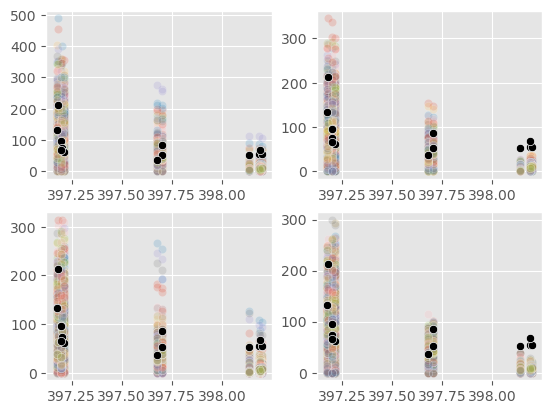

In [27]:
Fig3, axs3 = plt.subplots(2,2)
Fig4, axs4 = plt.subplots(2,2)
for draw in range(1000):
    mu_post_1_inplace = idata.posterior_predictive.isel({"feature":0,"draw":draw,"chain":0}).mu.values
    mu_post_2_inplace = idata.posterior_predictive.isel({"feature":0,"draw":draw,"chain":1}).mu.values
    mu_post_3_inplace = idata.posterior_predictive.isel({"feature":0,"draw":draw,"chain":2}).mu.values
    mu_post_4_inplace = idata.posterior_predictive.isel({"feature":0,"draw":draw,"chain":3}).mu.values

    sns.scatterplot(x=mz_axis_inplace,y=mu_post_1_inplace,ax=axs3[0,0],alpha=0.2)
    sns.scatterplot(x=mz_axis_inplace,y=mu_post_2_inplace,ax=axs3[0,1],alpha=0.2)
    sns.scatterplot(x=mz_axis_inplace,y=mu_post_3_inplace,ax=axs3[1,0],alpha=0.2)
    sns.scatterplot(x=mz_axis_inplace,y=mu_post_4_inplace,ax=axs3[1,1],alpha=0.2)

    for chain_idx,axis in enumerate(axs4.flatten()):
        max_int = idata.constant_data.intensity.values.max()
        post_draw = idata.posterior.isel({"draw":draw,"chain":chain_idx})
        charge = idata.constant_data.charge.values.flatten()[0]
        posterior_params = {}
        posterior_params["a"] = post_draw.alpha.values.flatten()[0]*max_int
        posterior_params["i_t"] = post_draw.i_t.values.flatten()[0]
        posterior_params["i_s"] = post_draw.i_s.values.flatten()[0]
        mz_mu = post_draw.ms_mz.values.flatten()[0]
        posterior_params["mz_s"] = post_draw.ms_s.values.flatten()[0]*model.model_parameters["mz_s_scale"]
        peaks = np.arange(6)
        λ = 0.000594 * (charge) * mz_mu - 0.03091
        posterior_params["w"] = λ**peaks/factorial(peaks)*np.exp(-λ)
        posterior_params["pos"] = peaks/charge +mz_mu
        z_inplace = np.zeros_like(mz_axis_inplace)
        for idx,(x,y) in enumerate(zip(mz_axis_inplace,scan_axis_inplace)):
            z_inplace[idx] = f(x,y,posterior_params)
        sns.scatterplot(x=mz_axis_inplace,y=z_inplace,alpha=0.2,ax=axis)


sns.scatterplot(x=mz_axis_inplace,y=idata.observed_data.isel({"feature":0}).obs.values.flatten(),ax=axs3[0,0],color="black")
sns.scatterplot(x=mz_axis_inplace,y=idata.observed_data.isel({"feature":0}).obs.values.flatten(),ax=axs3[0,1],color="black")
sns.scatterplot(x=mz_axis_inplace,y=idata.observed_data.isel({"feature":0}).obs.values.flatten(),ax=axs3[1,0],color="black")
sns.scatterplot(x=mz_axis_inplace,y=idata.observed_data.isel({"feature":0}).obs.values.flatten(),ax=axs3[1,1],color="black")
Fig3.show()
sns.scatterplot(x=mz_axis_inplace,y=idata.observed_data.isel({"feature":0}).obs.values.flatten(),ax=axs4[0,0],color="black")
sns.scatterplot(x=mz_axis_inplace,y=idata.observed_data.isel({"feature":0}).obs.values.flatten(),ax=axs4[0,1],color="black")
sns.scatterplot(x=mz_axis_inplace,y=idata.observed_data.isel({"feature":0}).obs.values.flatten(),ax=axs4[1,0],color="black")
sns.scatterplot(x=mz_axis_inplace,y=idata.observed_data.isel({"feature":0}).obs.values.flatten(),ax=axs4[1,1],color="black")
Fig4.show()

In [12]:
idata

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data
	> prior_predictions
	> predictions_constant_data
	> posterior_predictive
	> predictions

In [28]:
idata

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data
	> prior_predictions
	> predictions_constant_data
	> posterior_predictive
	> predictions

In [ ]:
for draw in range(1000):
    mus = idata.posterior.isel({"feature":0,"chain":0,"draw":draw}).mu.values
    obs = idata.posterior_predictive.isel({"feature":0,"chain":0,"draw":draw}).obs.values
    sns.scatterplot(x=mz_axis_inplace,y=mus,alpha=0.1,color="blue")
    sns.scatterplot(x=mz_axis_inplace,y=obs,alpha=0.1,color="red")
sns.scatterplot(x=mz_axis_inplace,y=idata.observed_data.isel({"feature":0}).obs.values,color="black")
plt.show()

In [ ]:
import pymc as pm
model2 = ModelM3(aligned_features,random_number_generator=rng)
with model2 as model:
    trace = pm.sample()


In [ ]:
with model2 as model:
    ppc = pm.sample_posterior_predictive(trace)

In [ ]:
Fig5,axs5 = plt.subplots(2,2)
Fig6,axs6 = plt.subplots(2,2)
mz_axis_inplace_pm = ppc.constant_data.isel({"feature":0,"isotopic_peak":0}).mz.values
scan_axis_inplace_pm = trace.constant_data.isel({"feature":0}).scan.values
for draw in range(1000):
    mu_post_1_inplace_pm = ppc.posterior_predictive.isel({"feature":0,"draw":draw,"chain":0}).mu.values
    mu_post_2_inplace_pm = ppc.posterior_predictive.isel({"feature":0,"draw":draw,"chain":1}).mu.values
    mu_post_3_inplace_pm = ppc.posterior_predictive.isel({"feature":0,"draw":draw,"chain":2}).mu.values
    mu_post_4_inplace_pm = ppc.posterior_predictive.isel({"feature":0,"draw":draw,"chain":3}).mu.values

    sns.scatterplot(x=mz_axis_inplace_pm,y=mu_post_1_inplace_pm,ax=axs5[0,0])
    sns.scatterplot(x=mz_axis_inplace_pm,y=mu_post_2_inplace_pm,ax=axs5[0,1])
    sns.scatterplot(x=mz_axis_inplace_pm,y=mu_post_3_inplace_pm,ax=axs5[1,0])
    sns.scatterplot(x=mz_axis_inplace_pm,y=mu_post_4_inplace_pm,ax=axs5[1,1])
    for chain_idx,axis in enumerate(axs6.flatten()):
        max_int = trace.constant_data.intensity.values.max()
        post_draw = trace.posterior.isel({"draw":draw,"chain":chain_idx})
        charge = trace.constant_data.charge.values.flatten()[0]
        posterior_params = {}
        posterior_params["a"] = post_draw.alpha.values.flatten()[0]*max_int
        posterior_params["i_t"] = post_draw.i_t.values.flatten()[0]
        posterior_params["i_s"] = post_draw.i_s.values.flatten()[0]
        mz_mu = post_draw.ms_mz.values.flatten()[0]
        posterior_params["mz_s"] = post_draw.ms_s.values.flatten()[0]*model.model_parameters["mz_s_scale"]
        peaks = np.arange(6)
        λ = 0.000594 * (charge) * mz_mu - 0.03091
        posterior_params["w"] = λ**peaks/factorial(peaks)*np.exp(-λ)
        posterior_params["pos"] = peaks/charge +mz_mu
        z_inplace_pm = np.zeros_like(mz_axis_inplace)
        for idx,(x,y) in enumerate(zip(mz_axis_inplace_pm,scan_axis_inplace_pm)):
            z_inplace_pm[idx] = f(x,y,posterior_params)
        sns.scatterplot(x=mz_axis_inplace_pm,y=z_inplace_pm,alpha=0.2,ax=axis,color="red")

sns.scatterplot(x=mz_axis_inplace_pm,y=ppc.observed_data.isel({"feature":0}).obs.values.flatten(),ax=axs5[0,0],color="black",alpha=0.2)
sns.scatterplot(x=mz_axis_inplace_pm,y=ppc.observed_data.isel({"feature":0}).obs.values.flatten(),ax=axs5[0,1],color="black",alpha=0.2)
sns.scatterplot(x=mz_axis_inplace_pm,y=ppc.observed_data.isel({"feature":0}).obs.values.flatten(),ax=axs5[1,0],color="black",alpha=0.2)
sns.scatterplot(x=mz_axis_inplace_pm,y=ppc.observed_data.isel({"feature":0}).obs.values.flatten(),ax=axs5[1,1],color="black",alpha=0.2)
sns.scatterplot(x=mz_axis_inplace_pm,y=ppc.observed_data.isel({"feature":0}).obs.values.flatten(),ax=axs6[0,0],color="black",alpha=0.2)
sns.scatterplot(x=mz_axis_inplace_pm,y=ppc.observed_data.isel({"feature":0}).obs.values.flatten(),ax=axs6[0,1],color="black",alpha=0.2)
sns.scatterplot(x=mz_axis_inplace_pm,y=ppc.observed_data.isel({"feature":0}).obs.values.flatten(),ax=axs6[1,0],color="black",alpha=0.2)
sns.scatterplot(x=mz_axis_inplace_pm,y=ppc.observed_data.isel({"feature":0}).obs.values.flatten(),ax=axs6[1,1],color="black",alpha=0.2)
plt.show()

In [ ]:
mz_axis = idata.predictions_constant_data.isel({"feature":0,"isotopic_peak":0}).mz.values
scan_axis = idata.predictions_constant_data.isel({"feature":0}).scan.values
prior_draw_idx = 322
mu_prior = idata.prior_predictions.isel({"feature":0,"draw":prior_draw_idx,"chain":0}).mu.values

sns.scatterplot(x=mz_axis,y=mu_prior)

plt.show()

In [ ]:
plt.hist(idata.posterior.me.values.flatten())
plt.show()

In [ ]:
idata_prior_predictions_constant_data_sliced = idata.predictions_constant_data.isel({"feature":0,"isotopic_peak":0})
idata_prior_predictions_sliced = idata.prior_predictions.isel({"feature":0})
x_prior = idata_prior_predictions_constant_data_sliced.mz.values
y_prior = idata_prior_predictions_sliced.mu.values

In [ ]:
y_prior.shape

In [ ]:
max_ys_prior = []
all_near_zero_idx_prior = []
some_over_zero_idx_prior = []

for draw in range(500):
        y_selected_prior = y_prior[0,draw,:]
        if np.all(y_selected_prior<=100):
            all_near_zero_idx_prior.append(draw)
        else:
            some_over_zero_idx_prior.append(draw)
        max_ys_prior.append(np.max(y_selected_prior))
        plt.scatter(x_prior,y_selected_prior,alpha=0.1)
plt.show()
plt.hist(max_ys_prior)
plt.show()

In [ ]:
print(len(all_near_zero_idx_prior))
all_near_zero_idx_prior

In [ ]:

from scipy.special import factorial
zero_max_int = idata.constant_data.intensity.values.max()
zero_draw = idata.prior.isel({"draw":prior_draw_idx})
charge = idata.constant_data.charge.values.flatten()[0]
prior_params = {}
prior_params["a"] = zero_draw.alpha.values.flatten()[0]*zero_max_int
prior_params["i_t"] = zero_draw.i_t.values.flatten()[0]
prior_params["i_s"] = zero_draw.i_s.values.flatten()[0]
mz_mu = zero_draw.ms_mz.values.flatten()[0]
prior_params["mz_s"] = zero_draw.ms_s.values.flatten()[0]*model.model_parameters["mz_s_scale"]
peaks = np.arange(6)
λ = 0.000594 * (charge) * mz_mu - 0.03091
prior_params["w"] = λ**peaks/factorial(peaks)*np.exp(-λ)
prior_params["pos"] = peaks/charge +mz_mu


In [ ]:
grid_x = idata.predictions_constant_data.isel({"feature":0,"isotopic_peak":0}).mz.values
grid_y = idata.predictions_constant_data.isel({"feature":0,"isotopic_peak":0}).scan.values
mu_pred = idata.prior_predictions.isel({"feature":0,"draw":prior_draw_idx}).mu.values.flatten()

In [ ]:
print(f"alpha:{prior_params['a']}")
print(f"scan mu: {prior_params['i_t']}")
print(f"scan sigma: {prior_params['i_s']}")
print(f"mass sigma: {prior_params['mz_s']}")
print(f"monoisotopic mass: {mz_mu}")
print(f"pos : {prior_params['pos']}")

In [ ]:
z = np.zeros_like(grid_x)
for idx,(x,y) in enumerate(zip(grid_x,grid_y)):
    z[idx] = f(x,y,prior_params)

df = pd.DataFrame({"Scan":grid_y,"Mz":grid_x,"Intensity":z})
sns.lineplot(x = df.Mz,y = df.Intensity,hue=df.Scan.values.astype("str"),legend=False)
plt.show()
sns.scatterplot(x=grid_x,y=mu_pred)
plt.show()